In [14]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
Image=r'C:\Users\divek\Desktop\sample.jpg'

In [16]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)


In [17]:
result = recognize_text(Image)
result


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[85, 51], [437, 51], [437, 113], [85, 113]],
  'HOW TO WRITE AlT',
  0.7882892616878944),
 ([[105, 111], [417, 111], [417, 173], [105, 173]],
  'TEXT AND IMAGE',
  0.9381261125054322),
 ([[90, 170], [433, 170], [433, 234], [90, 234]],
  'DESCRIPTIONS FOR',
  0.9829486344258936),
 ([[129, 231], [391, 231], [391, 293], [129, 293]],
  'THE VISUALLY',
  0.8621342571016222),
 ([[168, 292], [352, 292], [352, 352], [168, 352]],
  'IMPAIRED',
  0.817369318593293)]

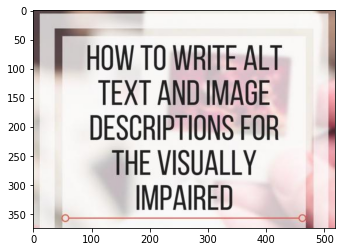

In [18]:
img = cv2.imread(Image)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


In [19]:
def extract_text(img_path):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show 
    axarr[1].imshow(img)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: HOW TO WRITE AlT (Probability: 0.79)
Detected text: TEXT AND IMAGE (Probability: 0.94)
Detected text: DESCRIPTIONS FOR (Probability: 0.98)
Detected text: THE VISUALLY (Probability: 0.86)
Detected text: IMPAIRED (Probability: 0.82)


<Figure size 432x288 with 0 Axes>

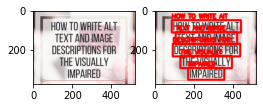

In [20]:
extract_text(Image)